In [1]:
from fn_cfg import *
import params as cfg

In [2]:
#   Functions

def extractEDF(file_name,local_directory):
    subfolder = file_name[:-7]
    directory = local_directory + '/' + subfolder + '/' + file_name
    edf_file = mne.io.read_raw_edf(directory)
    raw_data = edf_file.get_data()
    info = edf_file.info
    channelNames = info['ch_names']
    fs = int(info['sfreq'])
    chans_data = raw_data
    Ts = (np.arange(0,len(chans_data.T)/fs,1/fs)).reshape(len(np.arange(0,len(chans_data.T)/fs,1/fs)),1)
    return info,fs,Ts,channelNames,chans_data[0],chans_data[1],chans_data[2],chans_data[3],chans_data[4],chans_data[5],chans_data[6],chans_data[7],chans_data[8],chans_data[9],chans_data[10],chans_data[11],chans_data[12],chans_data[13],chans_data[14],chans_data[15],chans_data[16],chans_data[17],chans_data[18],chans_data[19],chans_data[20],chans_data[21],chans_data[22],chans_data[23],chans_data[24],chans_data[25],chans_data[26],chans_data[27],chans_data[28],chans_data[29],chans_data[30],chans_data[31],chans_data[32],chans_data[33],chans_data[34],chans_data[35],chans_data[36],chans_data[37],chans_data[38],chans_data[39],chans_data[40],chans_data[41],chans_data[42],chans_data[43],chans_data[44],chans_data[45],chans_data[46],chans_data[47],chans_data[48],chans_data[49],chans_data[50],chans_data[51],chans_data[52],chans_data[53],chans_data[54],chans_data[55],chans_data[56],chans_data[57],chans_data[58],chans_data[59],chans_data[60],chans_data[61],chans_data[62],chans_data[63]

def rolling_window(array,window_size,freq):
    #   Inputs  :   array    - 2D numpy array (d0 = samples, d1 = channels) of filtered EEG data
    #               window_size - size of window to be used for sliding
    #               freq   - step size for sliding window 
    #   Output  :   3D array (columns of array,no of windows,window size)
    def roll_window(array, window_size,freq):
        array = np.array(array,dtype='object')
        shape = (array.shape[0] - window_size + 1, window_size)
        strides = (array.strides[0],) + array.strides
        rolled = np.lib.stride_tricks.as_strided(array, shape=shape, strides=strides)
        return rolled[np.arange(0,shape[0],freq)]
    out_final = []
    for i in range(len(array)):
        out_final.append(roll_window(array[i],window_size,freq))
    out_final = np.asarray(out_final).T
    out_final = out_final.transpose()
    return out_final

In [3]:
local_dir = '/Users/joshuaighalo/Downloads/files-2'
data = extractEDF('S009R01.edf',local_dir)
eeg_channels = data[4]
info = data[0]
fs = data[1]
Ts = data[2]
channelNames = data[3]
window_size = 768
step_size = 256
nfft = 256
noverlap = 128
noChans = len(eeg_channels)
brainwaves = dict(delta = [0.5,4],theta = [4,8],alpha = [8,13],beta = [13,32],gamma = [32,100])

Extracting EDF parameters from /Users/joshuaighalo/Downloads/files-2/S009/S009R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


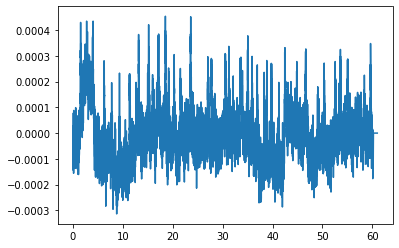

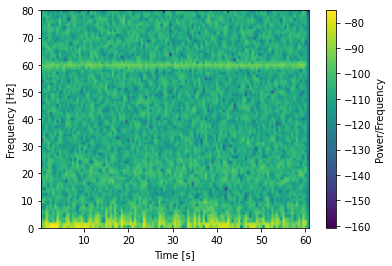

In [4]:
one_channel = eeg_channels
plt.plot(Ts,one_channel)
plt.show()
plt.figure('Spectrogram')
d, f, t, im = plt.specgram(one_channel, NFFT=fs, Fs=fs, noverlap=fs/2)
plt.colorbar(label= "Power/Frequency")
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.show()

In [5]:
files_EO = []
files_EC = []
for root, dirs, files in os.walk(local_dir):
    if files:
        files_EO.append(sorted(files)[0])
        files_EC.append(sorted(files)[2])
files_EO = files_EO[1:]
files_EC = files_EC[1:]

In [6]:
eeg_EO_fc5 = []
eeg_EO_fc3 = []
eeg_EO_fc1 = []
eeg_EO_fcz = []
eeg_EO_fc2 = []
eeg_EO_fc4 = []
eeg_EO_fc6 = []
eeg_EO_c5 = []
eeg_EO_c3 = []
eeg_EO_c1 = []
eeg_EO_cz = []
eeg_EO_c2 = []
eeg_EO_c4 = []
eeg_EO_c6 = []
eeg_EO_cp5 = []
eeg_EO_cp3 = []
eeg_EO_cp1 = []
eeg_EO_cpz = []
eeg_EO_cp2 = []
eeg_EO_cp4 = []
eeg_EO_cp6 = []
eeg_EO_fp1 = []
eeg_EO_fpz = []
eeg_EO_fp2 = []
eeg_EO_af7 = []
eeg_EO_af3 = []
eeg_EO_afz = []
eeg_EO_af4 = []
eeg_EO_af8 = []
eeg_EO_f7 = []
eeg_EO_f5 = []
eeg_EO_f3 = []
eeg_EO_f1 = []
eeg_EO_fz = []
eeg_EO_f2 = []
eeg_EO_f4 = []
eeg_EO_f6 = []
eeg_EO_f8 = []
eeg_EO_ft7 = []
eeg_EO_ft8 = []
eeg_EO_t7 = []
eeg_EO_t8 = []
eeg_EO_t9 = []
eeg_EO_t10 = []
eeg_EO_tp7 = []
eeg_EO_tp8 = []
eeg_EO_p7 = []
eeg_EO_p5 = []
eeg_EO_p3 = []
eeg_EO_p1 = []
eeg_EO_pz = []
eeg_EO_p2 = []
eeg_EO_p4 = []
eeg_EO_p6 = []
eeg_EO_p8 = []
eeg_EO_po7 = []
eeg_EO_po3 = []
eeg_EO_poz = []
eeg_EO_po4 = []
eeg_EO_po8 = []
eeg_EO_o1 = []
eeg_EO_oz = []
eeg_EO_o2 = []
eeg_EO_iz = []

eeg_EC_fc5 = []
eeg_EC_fc3 = []
eeg_EC_fc1 = []
eeg_EC_fcz = []
eeg_EC_fc2 = []
eeg_EC_fc4 = []
eeg_EC_fc6 = []
eeg_EC_c5 = []
eeg_EC_c3 = []
eeg_EC_c1 = []
eeg_EC_cz = []
eeg_EC_c2 = []
eeg_EC_c4 = []
eeg_EC_c6 = []
eeg_EC_cp5 = []
eeg_EC_cp3 = []
eeg_EC_cp1 = []
eeg_EC_cpz = []
eeg_EC_cp2 = []
eeg_EC_cp4 = []
eeg_EC_cp6 = []
eeg_EC_fp1 = []
eeg_EC_fpz = []
eeg_EC_fp2 = []
eeg_EC_af7 = []
eeg_EC_af3 = []
eeg_EC_afz = []
eeg_EC_af4 = []
eeg_EC_af8 = []
eeg_EC_f7 = []
eeg_EC_f5 = []
eeg_EC_f3 = []
eeg_EC_f1 = []
eeg_EC_fz = []
eeg_EC_f2 = []
eeg_EC_f4 = []
eeg_EC_f6 = []
eeg_EC_f8 = []
eeg_EC_ft7 = []
eeg_EC_ft8 = []
eeg_EC_t7 = []
eeg_EC_t8 = []
eeg_EC_t9 = []
eeg_EC_t10 = []
eeg_EC_tp7 = []
eeg_EC_tp8 = []
eeg_EC_p7 = []
eeg_EC_p5 = []
eeg_EC_p3 = []
eeg_EC_p1 = []
eeg_EC_pz = []
eeg_EC_p2 = []
eeg_EC_p4 = []
eeg_EC_p6 = []
eeg_EC_p8 = []
eeg_EC_po7 = []
eeg_EC_po3 = []
eeg_EC_poz = []
eeg_EC_po4 = []
eeg_EC_po8 = []
eeg_EC_o1 = []
eeg_EC_oz = []
eeg_EC_o2 = []
eeg_EC_iz = []

for i in range(len(files_EO)):
    eeg_EO_fc5.append((extractEDF(files_EO[i],local_dir))[4])
    eeg_EO_fc3.append((extractEDF(files_EO[i],local_dir))[5])
    eeg_EO_fc1.append((extractEDF(files_EO[i],local_dir))[6])
    eeg_EO_fcz.append((extractEDF(files_EO[i],local_dir))[7])
    eeg_EO_fc2.append((extractEDF(files_EO[i],local_dir))[8])
    eeg_EO_fc4.append((extractEDF(files_EO[i],local_dir))[9])
    eeg_EO_fc6.append((extractEDF(files_EO[i],local_dir))[10])
    eeg_EO_c5.append((extractEDF(files_EO[i],local_dir))[11])
    eeg_EO_c3.append((extractEDF(files_EO[i],local_dir))[12])
    eeg_EO_c1.append((extractEDF(files_EO[i],local_dir))[13])
    eeg_EO_cz.append((extractEDF(files_EO[i],local_dir))[14])
    eeg_EO_c2.append((extractEDF(files_EO[i],local_dir))[15])
    eeg_EO_c4.append((extractEDF(files_EO[i],local_dir))[16])
    eeg_EO_c6.append((extractEDF(files_EO[i],local_dir))[17])
    eeg_EO_cp5.append((extractEDF(files_EO[i],local_dir))[18])
    eeg_EO_cp3.append((extractEDF(files_EO[i],local_dir))[19])
    eeg_EO_cp1.append((extractEDF(files_EO[i],local_dir))[20])
    eeg_EO_cpz.append((extractEDF(files_EO[i],local_dir))[21])
    eeg_EO_cp2.append((extractEDF(files_EO[i],local_dir))[22])
    eeg_EO_cp4.append((extractEDF(files_EO[i],local_dir))[23])
    eeg_EO_cp6.append((extractEDF(files_EO[i],local_dir))[24])
    eeg_EO_fp1.append((extractEDF(files_EO[i],local_dir))[25])
    eeg_EO_fpz.append((extractEDF(files_EO[i],local_dir))[26])
    eeg_EO_fp2.append((extractEDF(files_EO[i],local_dir))[27])
    eeg_EO_af7.append((extractEDF(files_EO[i],local_dir))[28])
    eeg_EO_af3.append((extractEDF(files_EO[i],local_dir))[29])
    eeg_EO_afz.append((extractEDF(files_EO[i],local_dir))[30])
    eeg_EO_af4.append((extractEDF(files_EO[i],local_dir))[31])
    eeg_EO_af8.append((extractEDF(files_EO[i],local_dir))[32])
    eeg_EO_f7.append((extractEDF(files_EO[i],local_dir))[33])
    eeg_EO_f5.append((extractEDF(files_EO[i],local_dir))[34])
    eeg_EO_f3.append((extractEDF(files_EO[i],local_dir))[35])
    eeg_EO_f1.append((extractEDF(files_EO[i],local_dir))[36])
    eeg_EO_fz.append((extractEDF(files_EO[i],local_dir))[37])
    eeg_EO_f2.append((extractEDF(files_EO[i],local_dir))[38])
    eeg_EO_f4.append((extractEDF(files_EO[i],local_dir))[39])
    eeg_EO_f6.append((extractEDF(files_EO[i],local_dir))[40])
    eeg_EO_f8.append((extractEDF(files_EO[i],local_dir))[41])
    eeg_EO_ft7.append((extractEDF(files_EO[i],local_dir))[42])
    eeg_EO_ft8.append((extractEDF(files_EO[i],local_dir))[43])
    eeg_EO_t7.append((extractEDF(files_EO[i],local_dir))[44])
    eeg_EO_t8.append((extractEDF(files_EO[i],local_dir))[45])
    eeg_EO_t9.append((extractEDF(files_EO[i],local_dir))[46])
    eeg_EO_t10.append((extractEDF(files_EO[i],local_dir))[47])
    eeg_EO_tp7.append((extractEDF(files_EO[i],local_dir))[48])
    eeg_EO_tp8.append((extractEDF(files_EO[i],local_dir))[49])
    eeg_EO_p7.append((extractEDF(files_EO[i],local_dir))[50])
    eeg_EO_p5.append((extractEDF(files_EO[i],local_dir))[51])
    eeg_EO_p3.append((extractEDF(files_EO[i],local_dir))[52])
    eeg_EO_p1.append((extractEDF(files_EO[i],local_dir))[53])
    eeg_EO_pz.append((extractEDF(files_EO[i],local_dir))[54])
    eeg_EO_p2.append((extractEDF(files_EO[i],local_dir))[55])
    eeg_EO_p4.append((extractEDF(files_EO[i],local_dir))[56])
    eeg_EO_p6.append((extractEDF(files_EO[i],local_dir))[57])
    eeg_EO_p8.append((extractEDF(files_EO[i],local_dir))[58])
    eeg_EO_po7.append((extractEDF(files_EO[i],local_dir))[59])
    eeg_EO_po3.append((extractEDF(files_EO[i],local_dir))[60])
    eeg_EO_poz.append((extractEDF(files_EO[i],local_dir))[61])
    eeg_EO_po4.append((extractEDF(files_EO[i],local_dir))[62])
    eeg_EO_po8.append((extractEDF(files_EO[i],local_dir))[63])
    eeg_EO_o1.append((extractEDF(files_EO[i],local_dir))[64])
    eeg_EO_oz.append((extractEDF(files_EO[i],local_dir))[65])
    eeg_EO_o2.append((extractEDF(files_EO[i],local_dir))[66])
    eeg_EO_iz.append((extractEDF(files_EO[i],local_dir))[66])
    
    eeg_EC_fc5.append((extractEDF(files_EC[i],local_dir))[4])
    eeg_EC_fc3.append((extractEDF(files_EC[i],local_dir))[5])
    eeg_EC_fc1.append((extractEDF(files_EC[i],local_dir))[6])
    eeg_EC_fcz.append((extractEDF(files_EC[i],local_dir))[7])
    eeg_EC_fc2.append((extractEDF(files_EC[i],local_dir))[8])
    eeg_EC_fc4.append((extractEDF(files_EC[i],local_dir))[9])
    eeg_EC_fc6.append((extractEDF(files_EC[i],local_dir))[10])
    eeg_EC_c5.append((extractEDF(files_EC[i],local_dir))[11])
    eeg_EC_c3.append((extractEDF(files_EC[i],local_dir))[12])
    eeg_EC_c1.append((extractEDF(files_EC[i],local_dir))[13])
    eeg_EC_cz.append((extractEDF(files_EC[i],local_dir))[14])
    eeg_EC_c2.append((extractEDF(files_EC[i],local_dir))[15])
    eeg_EC_c4.append((extractEDF(files_EC[i],local_dir))[16])
    eeg_EC_c6.append((extractEDF(files_EC[i],local_dir))[17])
    eeg_EC_cp5.append((extractEDF(files_EC[i],local_dir))[18])
    eeg_EC_cp3.append((extractEDF(files_EC[i],local_dir))[19])
    eeg_EC_cp1.append((extractEDF(files_EC[i],local_dir))[20])
    eeg_EC_cpz.append((extractEDF(files_EC[i],local_dir))[21])
    eeg_EC_cp2.append((extractEDF(files_EC[i],local_dir))[22])
    eeg_EC_cp4.append((extractEDF(files_EC[i],local_dir))[23])
    eeg_EC_cp6.append((extractEDF(files_EC[i],local_dir))[24])
    eeg_EC_fp1.append((extractEDF(files_EC[i],local_dir))[25])
    eeg_EC_fpz.append((extractEDF(files_EC[i],local_dir))[26])
    eeg_EC_fp2.append((extractEDF(files_EC[i],local_dir))[27])
    eeg_EC_af7.append((extractEDF(files_EC[i],local_dir))[28])
    eeg_EC_af3.append((extractEDF(files_EC[i],local_dir))[29])
    eeg_EC_afz.append((extractEDF(files_EC[i],local_dir))[30])
    eeg_EC_af4.append((extractEDF(files_EC[i],local_dir))[31])
    eeg_EC_af8.append((extractEDF(files_EC[i],local_dir))[32])
    eeg_EC_f7.append((extractEDF(files_EC[i],local_dir))[33])
    eeg_EC_f5.append((extractEDF(files_EC[i],local_dir))[34])
    eeg_EC_f3.append((extractEDF(files_EC[i],local_dir))[35])
    eeg_EC_f1.append((extractEDF(files_EC[i],local_dir))[36])
    eeg_EC_fz.append((extractEDF(files_EC[i],local_dir))[37])
    eeg_EC_f2.append((extractEDF(files_EC[i],local_dir))[38])
    eeg_EC_f4.append((extractEDF(files_EC[i],local_dir))[39])
    eeg_EC_f6.append((extractEDF(files_EC[i],local_dir))[40])
    eeg_EC_f8.append((extractEDF(files_EC[i],local_dir))[41])
    eeg_EC_t7.append((extractEDF(files_EC[i],local_dir))[42])
    eeg_EC_t8.append((extractEDF(files_EC[i],local_dir))[43])
    eeg_EC_t9.append((extractEDF(files_EC[i],local_dir))[44])
    eeg_EC_t10.append((extractEDF(files_EC[i],local_dir))[45])
    eeg_EC_tp7.append((extractEDF(files_EC[i],local_dir))[46])
    eeg_EC_tp8.append((extractEDF(files_EC[i],local_dir))[47])
    eeg_EC_p7.append((extractEDF(files_EC[i],local_dir))[48])
    eeg_EC_p5.append((extractEDF(files_EC[i],local_dir))[49])
    eeg_EC_p3.append((extractEDF(files_EC[i],local_dir))[50])
    eeg_EC_p1.append((extractEDF(files_EC[i],local_dir))[51])
    eeg_EC_pz.append((extractEDF(files_EC[i],local_dir))[52])
    eeg_EC_p2.append((extractEDF(files_EC[i],local_dir))[53])
    eeg_EC_p4.append((extractEDF(files_EC[i],local_dir))[54])
    eeg_EC_p6.append((extractEDF(files_EC[i],local_dir))[55])
    eeg_EC_p8.append((extractEDF(files_EC[i],local_dir))[56])
    eeg_EC_po7.append((extractEDF(files_EC[i],local_dir))[57])
    eeg_EC_po3.append((extractEDF(files_EC[i],local_dir))[58])
    eeg_EC_poz.append((extractEDF(files_EC[i],local_dir))[59])
    eeg_EC_po4.append((extractEDF(files_EC[i],local_dir))[60])
    eeg_EC_po8.append((extractEDF(files_EC[i],local_dir))[61])
    eeg_EC_o1.append((extractEDF(files_EC[i],local_dir))[62])
    eeg_EC_oz.append((extractEDF(files_EC[i],local_dir))[63])
    eeg_EC_o2.append((extractEDF(files_EC[i],local_dir))[64])
    eeg_EC_iz.append((extractEDF(files_EC[i],local_dir))[65])


length = []
for i in range(len(eeg_EC_fc5)):
    length.append(len(eeg_EC_fc5[i]))

Extracting EDF parameters from /Users/joshuaighalo/Downloads/files-2/S038/S038R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /Users/joshuaighalo/Downloads/files-2/S038/S038R02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /Users/joshuaighalo/Downloads/files-2/S007/S007R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /Users/joshuaighalo/Downloads/files-2/S007/S007R02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /Users/joshuaighalo/Downloads/files-2/S031/S031R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /Users/joshuaighalo/Downloads/files-2/S031/S031R02.edf...
EDF file detected
Setting channel info structure...

In [8]:
eeg_EO_fc5 = rolling_window(eeg_EO_fc5,window_size=3200,freq=3200)



In [ ]:
delta_low = brainwaves['delta'][0]
delta_high = brainwaves['delta'][1]
theta_low = brainwaves['theta'][0]
theta_high = brainwaves['theta'][1]
alpha_low = brainwaves['alpha'][0]
alpha_high = brainwaves['alpha'][1]
beta_low = brainwaves['beta'][0]
beta_high = brainwaves['beta'][1]
gamma_low = brainwaves['gamma'][0]
gamma_high = brainwaves['gamma'][1]
delta_MT11 = averageBandPower(bp_MT11,'3D',fs,delta_low,delta_high,win)